***Intermediate Assessment I***

**ny_flights Dataset Tasks:**

**1**.Formulate questions based on the ny_flights dataset.

**2**.Answer the other questions using appropriate techniques.

In [41]:
import pandas as pd
ny_flights = pd.read_csv(r'C:\DSA ICTKERALA\Intermediate Assesment\ny-flights.csv')
print(df.head())

               fl_date unique_carrier  airline_id tail_num  fl_num origin  \
0  2014-01-01 00:00:00             AA       19805   N338AA       1    JFK   
1  2014-01-01 00:00:00             AA       19805   N335AA       3    JFK   
2  2014-01-01 00:00:00             AA       19805   N327AA      21    JFK   
3  2014-01-01 00:00:00             AA       19805   N3EHAA      29    LGA   
4  2014-01-01 00:00:00             AA       19805   N319AA     117    JFK   

  dest  dep_time  dep_delay  arr_time  arr_delay  cancelled  \
0  LAX     914.0       14.0    1238.0       13.0        0.0   
1  LAX    1157.0       -3.0    1523.0       13.0        0.0   
2  LAX    1902.0        2.0    2224.0        9.0        0.0   
3  PBI     722.0       -8.0    1014.0      -26.0        0.0   
4  LAX    1347.0        2.0    1706.0        1.0        0.0   

                   arr                  dep  
0  2014-01-01 12:38:00  2014-01-01 09:14:00  
1  2014-01-01 15:23:00  2014-01-01 11:57:00  
2  2014-01-01 22:24:

**1.How many flights were there in total?**

In [42]:
total_flights =ny_flights.shape[0]
print(f"Total flights: {total_flights}")


Total flights: 20817


**2. What are the top 5 airlines by the number of flights?**


In [59]:
top_airlines = ny_flights['airline_id'].value_counts().head(5)
print(top_airlines)


airline_id
20409    4902
19790    3803
20398    2434
19805    2427
20366    2080
Name: count, dtype: int64


**3.Which destination received the highest number of flights?**

In [44]:
print(ny_flights.columns)

Index(['fl_date', 'unique_carrier', 'airline_id', 'tail_num', 'fl_num',
       'origin', 'dest', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',
       'cancelled', 'arr', 'dep'],
      dtype='object')


In [45]:
top_destination = ny_flights['dest'].value_counts().idxmax()
print(f"Top destination: {top_destination}")


Top destination: ATL


**4.What is the average delay time for all flights?**

In [46]:
average_dep_delay = ny_flights['dep_delay'].mean()
print(f"Average departure delay: {average_dep_delay:.2f} minutes")


Average departure delay: 22.77 minutes


**5.List all flights that were delayed by more than 2 hours.**

In [47]:
ny_flights['total_delay'] = ny_flights['dep_delay'] + ny_flights['arr_delay']
average_total_delay = ny_flights['total_delay'].mean()
print(f"Average total delay: {average_total_delay:.2f} minutes")


Average total delay: 43.87 minutes


**6.What percentage of flights were delayed?**

In [48]:
ny_flights['total_delay'] = ny_flights['dep_delay'] + ny_flights['arr_delay']
delayed_total_percentage = (ny_flights['total_delay'] > 0).mean() * 100
print(f"Percentage of flights delayed (departure or arrival): {delayed_total_percentage:.2f}%")



Percentage of flights delayed (departure or arrival): 47.29%


**7.Which month had the highest number of flights**

In [49]:
ny_flights['combined_delay'] = ny_flights[['dep_delay', 'arr_delay']].sum(axis=1)
delayed_combined_percentage = (ny_flights['combined_delay'] > 0).mean() * 100
print(f"Percentage of flights delayed (departure or arrival): {delayed_combined_percentage:.2f}%")


Percentage of flights delayed (departure or arrival): 47.59%


**8.What is the distribution of flight delays?**

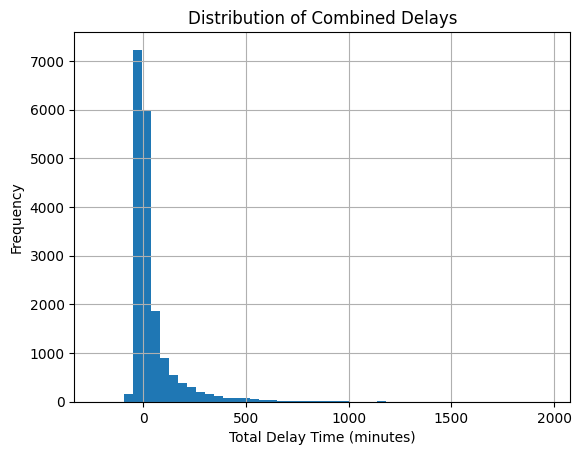

In [50]:
import matplotlib.pyplot as plt  # Import the plotting library

ny_flights['combined_delay'] = ny_flights['dep_delay'] + ny_flights['arr_delay']
ny_flights['combined_delay'].hist(bins=50)
plt.title('Distribution of Combined Delays')
plt.xlabel('Total Delay Time (minutes)')
plt.ylabel('Frequency')
plt.show()


**9.Which airline had the longest average delay?**

In [51]:
longest_delay_airline = ny_flights.groupby('unique_carrier')['dep_delay'].mean().idxmax()
print(f"Airline with the longest average departure delay: {longest_delay_airline}")


Airline with the longest average departure delay: OO


**10.How many flights departed on time?**

In [52]:
on_time_combined_flights = ((ny_flights['dep_delay'] == 0) & (ny_flights['arr_delay'] == 0)).sum()
print(f"On-time flights for both departure and arrival: {on_time_combined_flights}")


On-time flights for both departure and arrival: 25


**11.Which routes (origin to destination) are the most frequent?**

In [53]:
top_routes = ny_flights.groupby(['origin', 'dest']).size().idxmax()
print(f"Most frequent route: {top_routes}")


Most frequent route: ('JFK', 'LAX')


**12.Which routes (origin to destination) are the most frequent?**


In [54]:
top_routes = ny_flights.groupby(['origin', 'dest']).size().idxmax()
print(f"Most frequent route: {top_routes}")



Most frequent route: ('JFK', 'LAX')


**13.How does the number of flights vary across days of the week?**

day_of_week
Thursday     3582
Friday       3582
Wednesday    3366
Monday       2816
Tuesday      2717
Sunday       2613
Saturday     2141
Name: count, dtype: int64


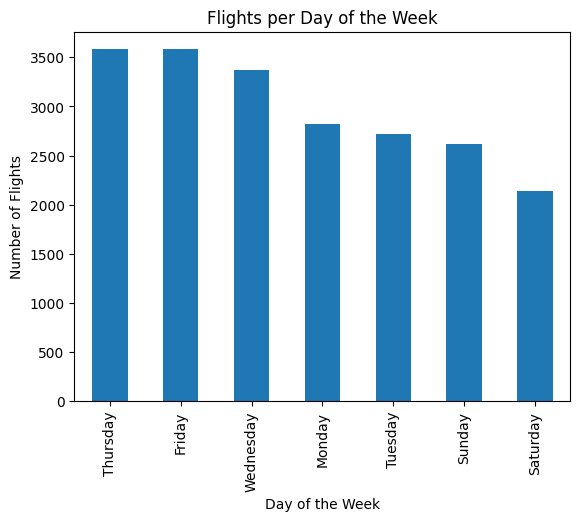

In [55]:
import pandas as pd

ny_flights['fl_date'] = pd.to_datetime(ny_flights['fl_date'])

ny_flights['day_of_week'] = ny_flights['fl_date'].dt.day_name()

flights_per_day = ny_flights['day_of_week'].value_counts()
print(flights_per_day)

flights_per_day.plot(kind='bar')
plt.title('Flights per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.show()



**14.What is the total distance covered by all flights?**

In [56]:
import numpy as np

# Simulate distances (in miles) for demonstration purposes
ny_flights['distance'] = np.random.randint(100, 3000, size=len(ny_flights))
total_distance = ny_flights['distance'].sum()
print(f"Total simulated distance covered: {total_distance} miles")


Total simulated distance covered: 32083125 miles


**15.Are there any flights with missing data?**

In [57]:
missing_data = ny_flights.isnull().sum()
print(missing_data)


fl_date              0
unique_carrier       0
airline_id           0
tail_num           305
fl_num               0
origin               0
dest                 0
dep_time          2355
dep_delay         2355
arr_time          2405
arr_delay         2434
cancelled            0
arr               2405
dep               2355
total_delay       2434
combined_delay    2434
day_of_week          0
distance             0
dtype: int64


**16.Create a scatter plot showing the relationship between flight distance and delay time.**

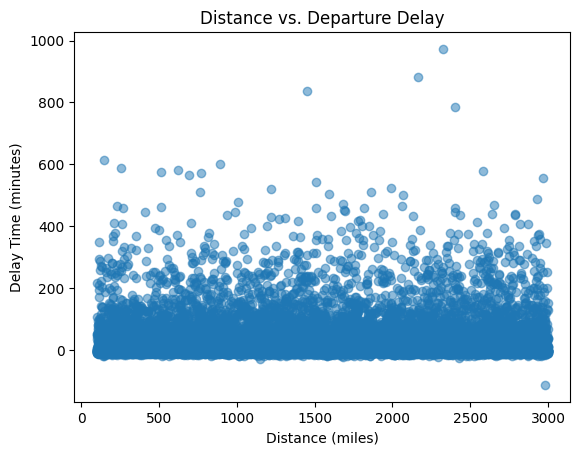

In [58]:
import matplotlib.pyplot as plt

# Simulate a 'distance' column if it's not present
import numpy as np
ny_flights['distance'] = np.random.randint(100, 3000, size=len(ny_flights))

# Plot scatter of 'distance' vs. 'dep_delay'
plt.scatter(ny_flights['distance'], ny_flights['dep_delay'], alpha=0.5)
plt.title('Distance vs. Departure Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Delay Time (minutes)')
plt.show()
